In [62]:
# install chembl web resource client
# !pip install chembl_webresource_client

In [61]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

drug_target = new_client.target
drug_targets = drug_target.search('amyloid-beta')
drug_targets_df = pd.DataFrame.from_dict(drug_targets)

drug_targets_df.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,20.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Rattus norvegicus,Amyloid beta A4 protein,20.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116.0
2,[],Mus musculus,Amyloid-beta A4 protein,20.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090.0
3,[],Homo sapiens,Amyloid beta-binding alcohol dehydrogenase,19.0,False,CHEMBL4295598,"[{'accession': 'Q2L8D9', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Mus musculus,Alpha-synuclein,19.0,False,CHEMBL5169100,"[{'accession': 'O55042', 'component_descriptio...",SINGLE PROTEIN,10090.0


In [66]:
selected_drug_target = drug_targets_df.target_chembl_id[0]
selected_drug_target

'CHEMBL2487'

In [70]:
# get the activity of the drug target which is always a protein macromolecule
# this gets all ligands(BACE) with known activities with the drug_target(i.e the protein macromolecule)

chembl_activity = new_client.activity

# returns beta amyloid inhibitors
drug_target_activity = chembl_activity.filter(target_chembl_id = selected_drug_target)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,72652,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,10.3
1,None,None,73705,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,0.9
2,None,None,75935,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,2000.0
3,None,None,79258,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,1000.0
4,None,None,81617,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890362,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158291,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000201,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,INH,%,UO_0000187,None,81.52
8330,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890363,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158291,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000201,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,INH,%,UO_0000187,None,47.99
8331,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890364,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158291,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000201,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,INH,%,UO_0000187,None,69.83
8332,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890365,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158291,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000201,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,INH,%,UO_0000187,None,54.6


In [75]:
beta_amyloid_inhibitors = pd.DataFrame(drug_target_activity)
beta_amyloid_inhibitors.to_csv("beta_amyloid_inhibitors.csv", index=False)
beta_amyloid_inhibitors.shape

(8334, 46)

In [92]:
filterd_res = drug_target_activity.filter(standard_type="Ki")
filterd_res = pd.DataFrame(filterd_res)
filterd_res.to_csv("bace_filtered_by_Ki.csv", index=False)
filterd_res.shape

(542, 46)

In [93]:
# clean data set

clean_standard_value = filterd_res[filterd_res.standard_value.notna()]
clean_canonical_smiles = clean_standard_value[clean_standard_value.canonical_smiles.notna()]
clean_bace_molecules = clean_canonical_smiles.drop_duplicates(subset=['molecule_chembl_id'], keep= 'first')
# clean_canonical_smiles.to_csv("serotonin_target_clean_dataset.csv", index=False)
print('clean_standard_value', clean_standard_value.shape)
print('clean_canonical_smiles', clean_canonical_smiles.shape)
print('clean_repeated_molecules', clean_bace_molecules.shape)

clean_standard_value (532, 46)
clean_canonical_smiles (532, 46)
clean_repeated_molecules (390, 46)


In [94]:
clean_bace_molecules.to_csv("clean_bace_filtered_by_ki.csv", index=False)
clean_bace_molecules

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,72652,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,10.3
1,None,None,73705,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,0.9
2,None,None,75935,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,2000.0
3,None,None,79258,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,1000.0
4,None,None,81617,[],CHEMBL649398,Inhibition constant against [125I]-7 (TZDM) bi...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,"{'action_type': 'BINDING AGENT', 'description'...",None,24823885,[],CHEMBL5140803,Binding affinity to amyloid beta (1 to 42) (un...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,36.9
538,"{'action_type': 'BINDING AGENT', 'description'...",None,24823886,[],CHEMBL5140803,Binding affinity to amyloid beta (1 to 42) (un...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,354.3
539,"{'action_type': 'BINDING AGENT', 'description'...",None,24823887,[],CHEMBL5140803,Binding affinity to amyloid beta (1 to 42) (un...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,645.2
540,"{'action_type': 'BINDING AGENT', 'description'...",None,24823922,[],CHEMBL5140807,Displacement of [125I]IMPY from amyloid beta (...,B,None,None,BAO_0000192,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,Ki,nM,UO_0000065,None,652.0


In [95]:
import pandas as pd

clean_bace_df = pd.read_csv('clean_bace_filtered_by_ki.csv');
clean_bace_targets = clean_bace_df[['molecule_chembl_id', 'canonical_smiles', 'standard_units', 'standard_value']]

In [96]:
# clean bace selected features to remove rows which standard unit are not in 'nM'

index_sum = []  

for index, row in clean_bace_targets.iterrows():
    
#     convert_ki_to_string = str(row['Ki (nM)'])
    if 'nM' not in row['standard_units']:
        
        print(row['standard_units'])
        print(index)
        
        index_sum.append(index)
        
print(len(index_sum))

0


In [97]:
# drop entire row of the bace_selected_features dataframe which standard unit is not in "nM"
clean_bace_targets.drop(clean_bace_targets.index[index_sum], inplace=True)

C:\Users\adewa\AppData\Local\Temp\ipykernel_8196\4277339381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_bace_targets.drop(clean_bace_targets.index[index_sum], inplace=True)


In [98]:
clean_bace_targets.to_csv('clean_bace_filtered_by_ki_needed_dataset_.csv', index=False)
clean_bace_targets

,molecule_chembl_id,canonical_smiles,standard_units,standard_value
0,CHEMBL81260,CN(C)c1ccc(-c2cn3cc(Br)ccc3n2)cc1,nM,10.3
1,CHEMBL55380,CN(C)c1ccc(-c2nc3ccc(I)cc3s2)cc1,nM,0.9
2,CHEMBL78410,CNc1ccc(-c2cn3cc(C)ccc3n2)cc1,nM,2000.0
3,CHEMBL81685,CNc1ccc(-c2cn3ccccc3n2)cc1,nM,1000.0
4,CHEMBL78621,Cc1ccc2nc(-c3ccc(N(C)C)cc3)cn2c1,nM,242.0
...,...,...,...,...
385,CHEMBL5174620,CN(C)c1ccc(/C=C/C=C/C=C(C#N)C#N)cc1,nM,36.9
386,CHEMBL5207309,CN(C)c1ccc(/C=C/C=C/C=C2C(=O)OC(C)(C)OC2=O)cc1,nM,354.3
387,CHEMBL5182168,CN(C)c1ccc(/C=C/C=C/C=C2C(=O)CC(C)(C)CC2=O)cc1,nM,645.2
388,CHEMBL5170177,COC(=O)C(=C/C=C/C=C/c1ccc(N(C)C)cc1)C(=O)OC,nM,652.0


In [99]:
clean_bace_targets[['standard_value']].describe()


,standard_value
count,390.000000
mean,466.488405
std,1625.150115
min,0.070000
25%,7.732500
50%,36.400000
75%,217.750000
max,20662.000000


In [100]:
# test for gaussian distribution of unscaled ki using  Shapiro-Wilk test
from scipy.stats import shapiro
import pandas as pd

bace_ki = clean_bace_targets[['standard_value']]

stat, p = shapiro(bace_ki)
print(stat, p)

if p > 0.05:
    print(f'data is likely Gaussian (p={p:.3f})')
else:
    print(f'data is not likely Gaussian (p={p:.3f})')

0.28913843631744385 4.407312451894029e-36
data is not likely Gaussian (p=0.000)


# Visualizing BACE Activity Data

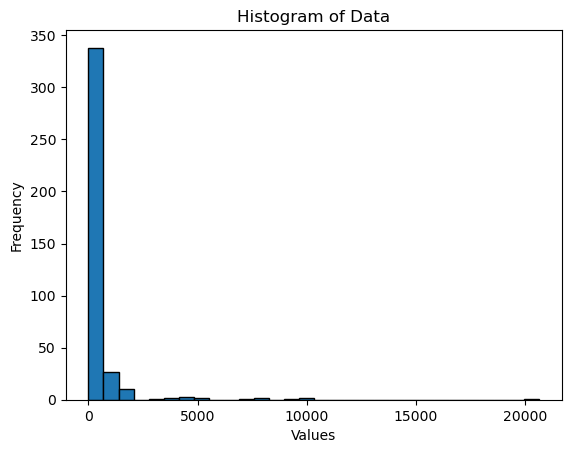

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.hist(bace_ki, bins=30, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

C:\Users\adewa\AppData\Local\Temp\ipykernel_8196\110239216.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bace_ki, shade=True)


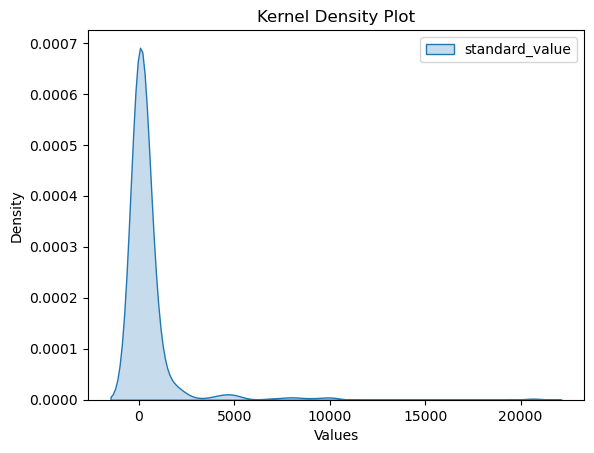

In [105]:
# Kernel Density Plot
sns.kdeplot(bace_ki, shade=True)
plt.title("Kernel Density Plot")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()